<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 09 Matrices

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])  
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

In [75]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from scipy.linalg import expm, eig

In [ ]:
matriz_encriptada = np.matrix([[1, 2, -3, 4, 5],
                              [-2, -5, 8, -8, -9],
                              [1, 2, -2, 7, 9],
                              [1, 1, 0, 6, 12],
                              [2, 4, -6, 8, 11]])


mensajes_encriptados = np.matrix([[47, 49, -19, 257, 487],
                                 [10, -9, 63, 137, 236],
                                 [79, 142, -184, 372, 536],
                                 [59, 70, -40, 332, 588]])

inversa = np.linalg.inv(matriz_encriptada)
mensaje_original=mensajes_encriptados*inversa
print(mensaje_original)  #matriz mensaje original

[[ 1. 18.  5. 27. 25.]
 [15. 21. 27.  8.  1.]
 [22.  9. 14.  7. 27.]
 [ 6. 21. 14. 27. 27.]]


In [ ]:
dicc = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ '
mensaje=''
for row in range(mensajes_encriptados.shape[0]):
  for colums in range(mensajes_encriptados.shape[1]):
    mensaje += dicc[round(mensaje_original[row,colums])-1]
print(mensaje)

ARE YOU HAVING FUN  


## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta X^T$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

In [ ]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise

In [ ]:
X=np.zeros((len(x1),2))
X[:,0]=1  #Todos los elemtos en la poscion cero con 1
X[:,1]=x1 #todos los elemento en posicion 2 llenarlo con las x
X=np.matrix(X)
sy.Matrix(X)

Matrix([
[1.0,                0],
[1.0, 1.11111111111111],
[1.0, 2.22222222222222],
[1.0, 3.33333333333333],
[1.0, 4.44444444444444],
[1.0, 5.55555555555556],
[1.0, 6.66666666666667],
[1.0, 7.77777777777778],
[1.0, 8.88888888888889],
[1.0,             10.0]])

In [ ]:
#Matriz Y
sy.Matrix(y)

Matrix([
[-0.862742040532672],
[  1.79354960859899],
[  1.33888344924757],
[  2.52117539290033],
[   3.9116078400703],
[  5.91655387332814],
[  5.48704221204173],
[  6.04910959839697],
[  7.82048579530403],
[   8.1729925076672]])

In [ ]:
(X.T@X).I

matrix([[ 0.34545455, -0.04909091],
        [-0.04909091,  0.00981818]])

In [ ]:
#otra forma:
theta=np.linalg.inv(X.T@X)@X.T@y
sy.Matrix(theta)

Matrix([[-0.0932389438567387, 0.8616209535118]])

In [ ]:
Y=theta@X.T
sy.Matrix(Y)

Matrix([[-0.0932389438567387, 0.864117671156372, 1.82147428616948, 2.77883090118259, 3.7361875161957, 4.69354413120882, 5.65090074622193, 6.60825736123504, 7.56561397624815, 8.52297059126126]])

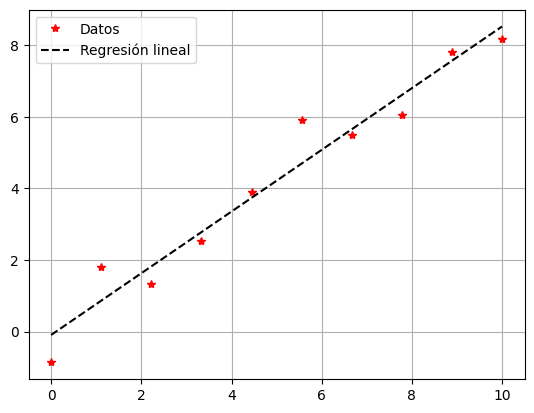

In [ ]:
plt.plot(x1,y,'r*', label='Datos')
plt.plot(x1,Y.T,'k--', label='Regresión lineal')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Para un campo multivariado
N = 20
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

'''N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
# scatter = ax.scatter(x1, x2, y,"-")'''

'N = 10\nX1, X2 = np.meshgrid(x1,x2)\nY = 2*X1 - 3*X2 + 0.0\nfig, ax = plt.subplots(subplot_kw={"projection": "3d"})\nsurf = ax.plot_surface(X1, X2, Y)\n# scatter = ax.scatter(x1, x2, y,"-")'

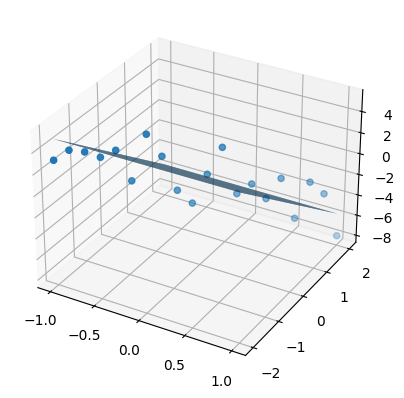

In [ ]:
X=np.zeros((len(x1),3))
X[:,0]=1  #Todos los elemtos en la poscion cero con 1
X[:,1]=x1 #todos los elemento en posicion 2 llenarlo con las x
X[:,2]=x2 #todos los elemento en posicion 2 llenarlo con las x
X=np.matrix(X)
sy.Matrix(X) #Matriz X
sy.Matrix(y) #Matriz y
theta=np.linalg.inv(X.T@X)@X.T@y
sy.Matrix(theta)
Y=theta@X.T
sy.Matrix(Y)

X1, X2 = np.meshgrid(x1,x2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y.T, label='Regresión lineal')
scatter = ax.scatter(x1, x2, y,"-", label='Datos')


## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [ ]:
#1).

A=np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

eigenvalues, eigenvectors=np.linalg.eig(A)  #autovalores y autovectores
print("Autovalores: \n", eigenvalues)
print("\nAutovectores: \n", eigenvectors)

D=np.diag(eigenvalues)
U=eigenvectors
U_inv=np.linalg.inv(U)
mat_diagonal= U @ D @ U_inv

print("\nMatriz diagonalizada: \n")
print(mat_diagonal)

Autovalores: 
 [4.+0.00000000e+00j 2.+1.68652966e-08j 2.-1.68652966e-08j]

Autovectores: 
 [[-0.57735027+0.00000000e+00j -0.57735027+9.73718355e-09j
  -0.57735027-9.73718355e-09j]
 [ 0.57735027+0.00000000e+00j  0.57735027+0.00000000e+00j
   0.57735027-0.00000000e+00j]
 [-0.57735027+0.00000000e+00j  0.57735027-9.73718355e-09j
   0.57735027+9.73718355e-09j]]

Matriz diagonalizada: 

[[ 2.00000000e+00+4.22907063e-10j -1.00000000e+00+4.22907063e-10j
   1.00000000e+00-2.16182500e-24j]
 [ 1.88737914e-15-4.45946263e-10j  3.00000000e+00-4.45946263e-10j
  -1.00000000e+00-1.79300708e-24j]
 [ 2.00000000e+00+2.91325159e-11j  1.00000000e+00+2.91325159e-11j
   3.00000000e+00+1.30125162e-24j]]


<ipython-input-92-9524690f6110>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  rt[i] = r_t


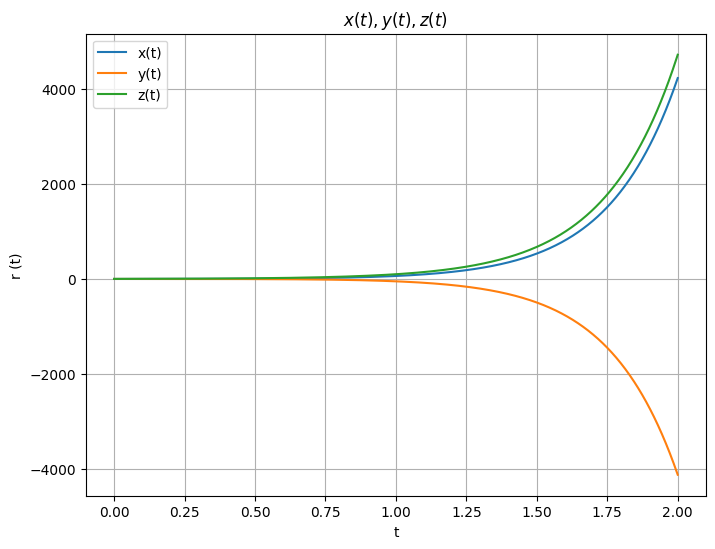

In [92]:
#2).
#3).

r0=np.array([1,1,2])
t=np.linspace(0, 2, 1000)

rt=np.zeros((len(t), 3))  #r(t) para cada valor de t en el intervalo de tiempo
for i, ti in enumerate(t):
  r_t=U@np.diag(np.exp(eigenvalues*ti))@U_inv @ r0
  rt[i]=r_t

x=rt[:, 0]
y=rt[:, 1]
z=rt[:, 2]

plt.figure(figsize=(8,6))
plt.plot(t,x,label='x(t)')
plt.plot(t,y,label='y(t)')
plt.plot(t,z,label='z(t)')
plt.title('$x(t),y(t),z(t)$')
plt.xlabel('t')
plt.ylabel('r (t)')
plt.legend()
plt.grid(True)
plt.show()

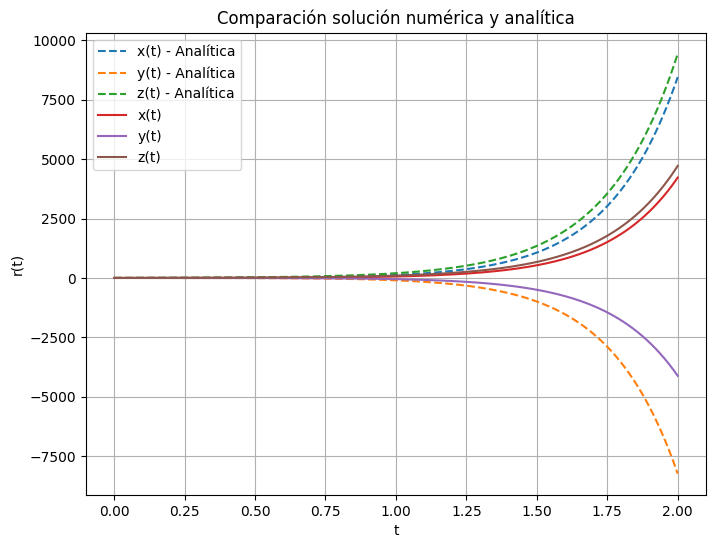

In [93]:
#4). Comparación con la solución analítica

def solucion_analitica(t,x0,y0,z0):
  x = x0*(np.exp(2*t)*(1 +np.exp(2*t)-2*t))+y0*(-2*t*np.exp(2*t))+z0*(np.exp(2*t)*(-1+np.exp(2*t)))
  y = x0*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t))+y0*(2*(t+1)*np.exp(2*t))+z0*(-np.exp(2*t)*(-1+np.exp(2*t)))
  z = x0*(np.exp(2*t)*(-1+np.exp(2*t)+2*t))+y0*(2*t*np.exp(2*t))+z0*(np.exp(2*t)*(1+np.exp(2*t)))
  return x, y, z

t=np.linspace(0,2,1000)
x0,y0,z0=1,1,2

xa,ya,za=solucion_analitica(t,x0,y0,z0)

plt.figure(figsize=(8,6))
plt.plot(t, xa, '--', label='x(t) - Analítica')
plt.plot(t, ya, '--', label='y(t) - Analítica')
plt.plot(t, za, '--', label='z(t) - Analítica')
plt.plot(t,x,label='x(t)')
plt.plot(t,y,label='y(t)')
plt.plot(t,z,label='z(t)')
plt.title('Comparación solución numérica y analítica')
plt.xlabel('t')
plt.ylabel('r(t)')
plt.legend()
plt.grid(True)
plt.show()

## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

In [101]:
A=np.array([[0, 2],
              [0.3, 0.5]])

p0=np.array([0, 10])  #vector de población inicial (sin pájaros jóvenes)
years=20
poblacion=np.zeros((years+1,2))
poblacion[0]=p0

for i in range(1,years+1): #evolucion de la poblacion
  poblacion[i]=A@poblacion[i-1]

for i in range(years+1):
  pj, pa=poblacion[i]
  conv=pj/pa
  print(f"Año {i}: Pájaros jóvenes= {int(pj)}, Pájaros adultos = {int(pa)}, Razón = {conv:.2f}")

Año 0: Pájaros jóvenes= 0, Pájaros adultos = 10, Razón = 0.00
Año 1: Pájaros jóvenes= 20, Pájaros adultos = 5, Razón = 4.00
Año 2: Pájaros jóvenes= 10, Pájaros adultos = 8, Razón = 1.18
Año 3: Pájaros jóvenes= 17, Pájaros adultos = 7, Razón = 2.34
Año 4: Pájaros jóvenes= 14, Pájaros adultos = 8, Razón = 1.66
Año 5: Pájaros jóvenes= 17, Pájaros adultos = 8, Razón = 2.00
Año 6: Pájaros jóvenes= 17, Pájaros adultos = 9, Razón = 1.82
Año 7: Pájaros jóvenes= 19, Pájaros adultos = 10, Razón = 1.91
Año 8: Pájaros jóvenes= 20, Pájaros adultos = 10, Razón = 1.86
Año 9: Pájaros jóvenes= 21, Pájaros adultos = 11, Razón = 1.89
Año 10: Pájaros jóvenes= 22, Pájaros adultos = 12, Razón = 1.87
Año 11: Pájaros jóvenes= 24, Pájaros adultos = 12, Razón = 1.88
Año 12: Pájaros jóvenes= 25, Pájaros adultos = 13, Razón = 1.88
Año 13: Pájaros jóvenes= 27, Pájaros adultos = 14, Razón = 1.88
Año 14: Pájaros jóvenes= 29, Pájaros adultos = 15, Razón = 1.88
Año 15: Pájaros jóvenes= 31, Pájaros adultos = 16, Razón 